In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

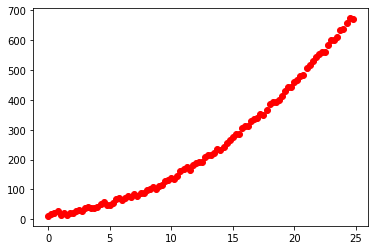

In [80]:
# tr=pd.read_csv("lin_reg_data.csv",delim_whitespace=True) # importing dataset on housing prices
# x=tr["Brain_Weight"].as_matrix()
# y=tr["Body_Weight"].as_matrix()
x=np.arange(0,25,0.25) # 100 input points
y=[]
for i in x:
    y.append(i**2+2*i+8+np.random.randint(low=0,high=20)) # quadratic plus some random noise
x=np.reshape(x,(100,1))
y=np.reshape(y,(100,1))
plt.plot(x,y,'ro')

In [81]:
size=np.size(x) # please define size of dataset here
def xvec(p,degree):
    xv=[]
    for i in range(0,degree+1):
        xv.append(x[p]**(i))
    xv=np.array(xv)
    return np.reshape(xv,(degree+1,1))
# print(np.dot(np.random.randn(1,2),xvec(2,1)))

In [93]:
def learner(lr, degree, err): # epochs is really unnecessary
    converged=False
    theta=np.random.randn(degree+1)
    theta=np.reshape(theta,(1,degree+1))
    i=0
    while not converged:
        # print(xvec(5,degree))
        h=lambda k:np.dot(theta,xvec(k,degree)) # defining hypothesis
        # print(np.reshape(xvec,(2,1)))
        # Using standard gradient descent
        loss=0 # this is not pure loss, it is (h(x)-y)
        # print("theta=",theta, 'size=',np.size(h(5)))
        for j in range(0,size):
            loss+=(h(j)-y[j])
        # print('loss size=',np.size(loss))
        # we will use mean-squared loss here for gradient descent
        if abs(loss[0])>err and i<size:
            theta = theta-lr*xvec(i,degree).transpose()*loss[0]
            print("iteration:",i+1," loss:",loss[0]**2/2)
            i+=1
        else:
            print("converged,loss=",loss[0])
            # print(np.shape(loss))
            converged = True
    return [theta,degree]

In [95]:
result=learner(10**(-6),2,5) # (2*10**(-8),1,10),(3*10**(-15),2,300000)
print(result)
pred=[]
for i in range(0,size):
    pred.append(np.dot(result[0],xvec(i,result[1])))
print(np.shape(pred))
# print(pred)

iteration: 1  loss: [1.07842157e+08]
iteration: 2  loss: [1.0782059e+08]
iteration: 3  loss: [1.07456036e+08]
iteration: 4  loss: [1.06202644e+08]
iteration: 5  loss: [1.03549138e+08]
iteration: 6  loss: [99071578.25258902]
iteration: 7  loss: [92504312.5680694]
iteration: 8  loss: [83814050.84476292]
iteration: 9  loss: [73254493.02311997]
iteration: 10  loss: [61375745.07167957]
iteration: 11  loss: [48968543.57722169]
iteration: 12  loss: [36940380.7662942]
iteration: 13  loss: [26145885.02935689]
iteration: 14  loss: [17217510.67293979]
iteration: 15  loss: [10451398.49141206]
iteration: 16  loss: [5787959.33219845]
iteration: 17  loss: [2890409.69105297]
iteration: 18  loss: [1284369.61689727]
iteration: 19  loss: [500045.41467756]
iteration: 20  loss: [167498.68027701]
iteration: 21  loss: [47227.57424767]
iteration: 22  loss: [10911.4324511]
iteration: 23  loss: [1996.64233084]
iteration: 24  loss: [276.75963603]
iteration: 25  loss: [27.3360598]
converged,loss= [-1.87578053]
[a

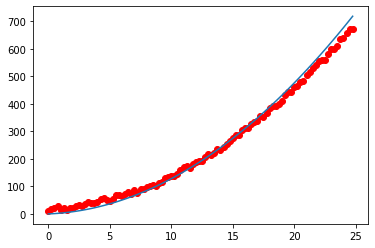

In [96]:
plt.plot(x,y,'ro') # discrete data points plot
plt.plot(x,np.reshape(pred,(size,1)))# fits predicted graph in form of blue line
plt.show()